In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import cmasher as cmr 

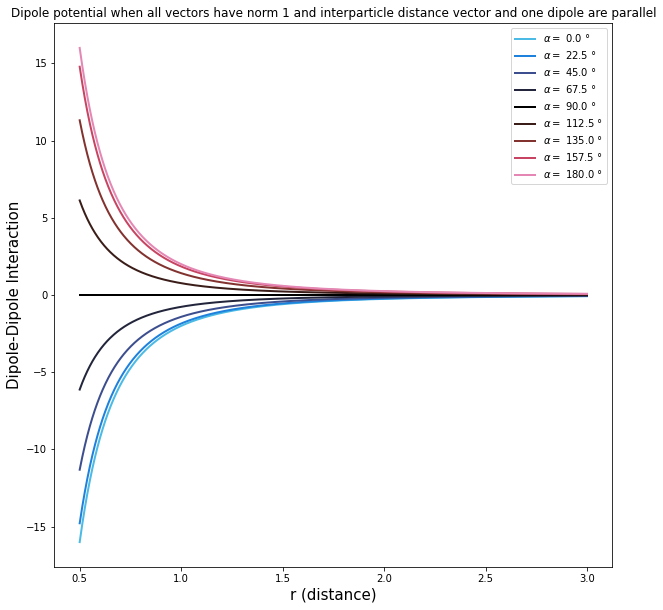

In [3]:

sns.set_palette('cmr.redshift',9)
# potential simplified as we assume that p1 and r are parallel 
def dipole_potential_parallel(R,alpha):
    norm_p1 = 1
    norm_p2 = 1 
    U = -1/np.power(R,3)*2*np.cos(alpha)
    return U

def dipole_potential_general(R,alpha,beta):
    norm_p1=1 
    norm_p2=1 
    U = ((norm_p1*norm_p2)/np.power(R,3))*(np.cos(alpha) - 3*np.cos(beta)*np.cos(alpha+beta))
    return U

# and  m1,m2 in 0,pi 
R=np.linspace(0.5,3,1000)
fig,ax = plt.subplots(figsize=(10,10))
for alpha in np.linspace(0,np.pi,9):
    beta=0
    U = dipole_potential_general(R,alpha,beta)
    ax.plot(R,U,
            lw=2,
            label="$\\alpha = $ {} $\degree$".format(np.round(alpha*180/np.pi,1)))

plt.ylabel("Dipole-Dipole Interaction",size=15)
plt.xlabel("r (distance)",size=15)
plt.title("Dipole potential when all vectors have norm 1 and interparticle distance vector and one dipole are parallel")
plt.legend()
plt.show()

    

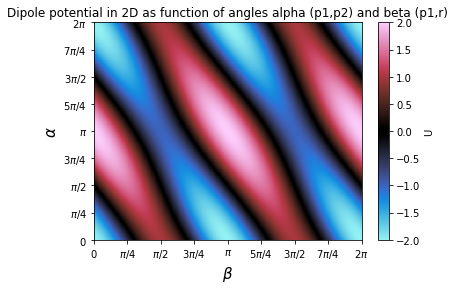

In [4]:
# alpha: angle between p1 and p2 
# beta: angle between p1 and r 
# gamma: in 2D given by alpha+beta  

def dipole_potential_general(R,alpha,beta):
    norm_p1=1 
    norm_p2=1 
    U = ((norm_p1*norm_p2)/np.power(R,3))*(np.cos(alpha) - 3*np.cos(beta)*np.cos(alpha+beta))
    return U


R=1
U=np.zeros((500,500))
Alpha = np.linspace(0,2*np.pi,500)
Beta = np.linspace(0,2*np.pi,500)


for i, alpha in enumerate(Alpha):
    for j, beta in enumerate(Beta):
        U[i,j] = dipole_potential_general(R,alpha,beta)


U_min, U_max = -2,2

fig, ax = plt.subplots()

c = ax.pcolormesh(Alpha, Beta, U, cmap='cmr.redshift', vmin=U_min, vmax=U_max)
ax.set_title('Dipole potential in 2D as function of angles alpha (p1,p2) and beta (p1,r)')
# set the limits of the plot to the limits of the data
ax.axis([Alpha.min(), Alpha.max(), Beta.min(), Beta.max()])
ax.set_xlabel("$\\beta$",size=15)
ax.set_ylabel("$\\alpha$",size=15)

ax.set_xticks(np.arange(0, 2*np.pi+0.01, np.pi/4))
ax.set_yticks(np.arange(0, 2*np.pi+0.01, np.pi/4))
labels = ['$0$', r'$\pi/4$', r'$\pi/2$', r'$3\pi/4$', r'$\pi$',
          r'$5\pi/4$', r'$3\pi/2$', r'$7\pi/4$', r'$2\pi$']
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

fig.colorbar(c, ax=ax, label="U")



## Dipole potential 
$U(\beta,\gamma) =  \frac{1}{r^{3}}(\cos{(\gamma-\beta)} - 3\cos{\beta}\cos{\gamma})$



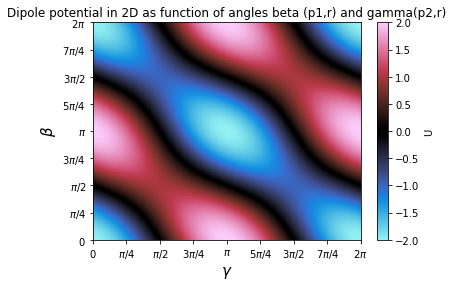

In [5]:
# beta: angle between p1 and r 
# gamma: angle between p2 and r 
# alpha: angle between p1 and p2, given by gamma-beta
def dipole_potential_general(R,beta,gamma):
    norm_p1=1 
    norm_p2=1 
    U = ((norm_p1*norm_p2)/np.power(R,3))*(np.cos(gamma-beta) - 3*np.cos(beta)*np.cos(gamma))
    return U


R=1
U=np.zeros((500,500))

Beta = np.linspace(0,2*np.pi,500)
Gamma = np.linspace(0,2*np.pi,500)

for i, beta in enumerate(Beta):
    for j, gamma in enumerate(Gamma):
        U[i,j] = dipole_potential_general(R,beta,gamma)


U_min, U_max = -2,2

fig, ax = plt.subplots()

c = ax.pcolormesh(Gamma, Beta, U, cmap='cmr.redshift', vmin=U_min, vmax=U_max)
ax.set_title('Dipole potential in 2D as function of angles beta (p1,r) and gamma(p2,r)')
# set the limits of the plot to the limits of the data
ax.axis([Gamma.min(), Gamma.max(), Beta.min(), Beta.max()])
ax.set_xlabel("$\\gamma$",size=15)
ax.set_ylabel("$\\beta$",size=15)

ax.set_xticks(np.arange(0, 2*np.pi+0.01, np.pi/4))
ax.set_yticks(np.arange(0, 2*np.pi+0.01, np.pi/4))
labels = ['$0$', r'$\pi/4$', r'$\pi/2$', r'$3\pi/4$', r'$\pi$',
          r'$5\pi/4$', r'$3\pi/2$', r'$7\pi/4$', r'$2\pi$']
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

fig.colorbar(c, ax=ax, label="U")


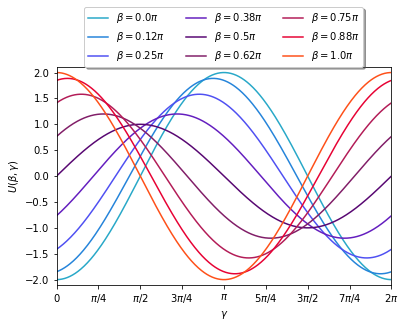

In [6]:
R=1
def dipole_potential_general(R,beta,gamma):
    norm_p1=1 
    norm_p2=1 
    U = ((norm_p1*norm_p2)/np.power(R,3))*(np.cos(gamma-beta) - 3*np.cos(beta)*np.cos(gamma))
    return U

U=np.zeros(500)
sns.set_palette('cmr.guppy_r',9)
Gamma = np.linspace(0,2*np.pi,500)
fig,ax=plt.subplots()
ax.set_xlim([0,2*np.pi])
ax.set_ylim([-2.1,2.1])
ax.set_xlabel("$\\gamma$")
ax.set_ylabel("$U(\\beta,\\gamma)$")
for beta in np.linspace(0.0,np.pi,9):
    for i, gamma in enumerate(Gamma):
        U[i] = dipole_potential_general(R,beta,gamma)


    plt.plot(Gamma,U,label="$\\beta = {}\pi$".format(np.round(beta/np.pi,2)))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3),
          ncol=3, fancybox=True, shadow=True)

ax.set_xticks(np.arange(0, 2*np.pi+0.01, np.pi/4))
labels = ['$0$', r'$\pi/4$', r'$\pi/2$', r'$3\pi/4$', r'$\pi$',
          r'$5\pi/4$', r'$3\pi/2$', r'$7\pi/4$', r'$2\pi$']
ax.set_xticklabels(labels)

plt.show()


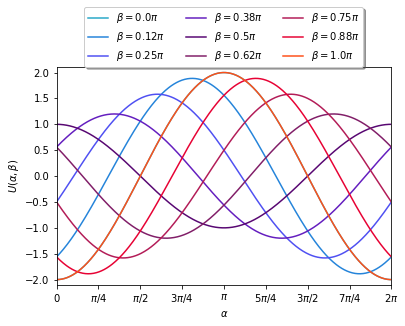

In [7]:

def dipole_potential_general(R,alpha,beta):
    norm_p1=1 
    norm_p2=1 
    U = ((norm_p1*norm_p2)/np.power(R,3))*(np.cos(alpha) - 3*np.cos(beta)*np.cos(alpha+beta))
    return U


R=1
U=np.zeros(500)
sns.set_palette('cmr.guppy_r',9)
Alpha = np.linspace(0,2*np.pi,500)
fig,ax=plt.subplots()
ax.set_xlim([0,2*np.pi])
ax.set_ylim([-2.1,2.1])
ax.set_xlabel("$\\alpha$")
ax.set_ylabel("$U(\\alpha,\\beta)$")
for beta in np.linspace(0.0,np.pi,9):
    for i, alpha in enumerate(Alpha):
        U[i] = dipole_potential_general(R,alpha,beta)


    plt.plot(Alpha,U,label="$\\beta = {}\pi$".format(np.round(beta/np.pi,2)))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3),
          ncol=3, fancybox=True, shadow=True)

ax.set_xticks(np.arange(0, 2*np.pi+0.01, np.pi/4))
labels = ['$0$', r'$\pi/4$', r'$\pi/2$', r'$3\pi/4$', r'$\pi$',
          r'$5\pi/4$', r'$3\pi/2$', r'$7\pi/4$', r'$2\pi$']
ax.set_xticklabels(labels)
plt.show()


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
import matplotlib.ticker as ticker
from matplotlib.patches import Circle

R=1
def dipole_potential_general(R,beta,gamma):
    norm_p1=1 
    norm_p2=1 
    U = ((norm_p1*norm_p2)/np.power(R,3))*(np.cos(gamma-beta) - 3*np.cos(beta)*np.cos(gamma))
    return U


def plot(beta,gamma):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))
    fig.suptitle('2D Dipole Potential')
  
    # subplot 1 
    U=np.zeros(500)
    Gamma = np.linspace(0,2*np.pi,500)
    ax1.set_xlim([0,2*np.pi])
    ax1.set_ylim([-2.1,2.1])
    ax1.set_xlabel("$\\gamma$")
    ax1.set_ylabel("$U(\\beta,\\gamma)$")
    
    for i, gamma_prime in enumerate(Gamma):
        U[i] = dipole_potential_general(R,beta,gamma_prime)

    ax1.plot(Gamma,U,label="$\\beta = {}\pi$".format(np.round(beta/np.pi,2)),c='b',lw=2)
    ax1.scatter(gamma,dipole_potential_general(R,beta,gamma),s=60,c='r', label="$\\gamma= {}\\pi$".format(np.round(gamma/np.pi,2)),zorder=10)
    ax1.plot(np.linspace(0,2*np.pi,100),np.zeros(100),c='k',alpha=0.5)
    ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3),
            ncol=3, fancybox=True, shadow=True)

    ax1.set_xticks(np.arange(0, 2*np.pi+0.01, np.pi/4))
    labels = ['$0$', r'$\pi/4$', r'$\pi/2$', r'$3\pi/4$', r'$\pi$',
          r'$5\pi/4$', r'$3\pi/2$', r'$7\pi/4$', r'$2\pi$']
    ax1.set_xticklabels(labels)    


    thetas = np.arange(-np.pi, np.pi, .05)
    coordinates = np.vstack((np.cos(thetas),np.sin(thetas)))
   
    ax2.xaxis.set_major_locator(ticker.NullLocator())
    ax2.yaxis.set_major_locator(ticker.NullLocator())    

    # subplot 2 
    ax2.set_xlim(-1.1,3.1)
    ax2.set_ylim(-1.1,1.1)
    shiftx=2.0 
    shifty=0
    ax2.set_aspect('equal')


    center = (0, 0)
    radius = 1
    circle = Circle(center, radius,color="blue", alpha=0.3)
    ax2.add_patch(circle)

    center = (2, 0)
    radius = 1
    circle = Circle(center, radius, color="red", alpha=0.3)
    ax2.add_patch(circle)


    ax2.arrow(0, shifty, np.cos(beta), np.sin(beta), head_width=0.15, color='b', length_includes_head=True)
    ax2.arrow(shiftx, shifty, np.cos(gamma), np.sin(gamma), head_width=0.15, color='r', length_includes_head=True)
    ax2.arrow(0, 0, 2, 0, head_width=0.15, color='k', length_includes_head=True)
    
   
interact(plot, 
         beta = widgets.FloatSlider(value=0, min=0, max=2*np.pi, step=0.1), 
         gamma = widgets.FloatSlider(value=0, min=0, max=2*np.pi, step=0.1),)

plt.show()

interactive(children=(FloatSlider(value=0.0, description='beta', max=6.283185307179586), FloatSlider(value=0.0…

## Shifted dipole potentials
Shifting the dipoles off-center equates to changing the contact distance from the diameter of the sphere from a constant to a variable that is dependent on the relative particle orientation. In this case r can be expressed as a function of $\beta$, the angle between dipole p1 and the distance vector r, $\gamma$, the angle between the dipole p2 and r and the particle position vectors $r_1$ and $r_2$. Note that the rotation of the particle and of the dipole are fixed. 


$r^{'} = r(r_1,r_2,\beta,\gamma) = \Omega_{\gamma}(r_2) - \Omega_{\beta}(r_1)$, 

where $\Omega_{*}$ denotes the 2D rotation vectors rotating from the origin. 

$\Omega_{\beta} = \begin{bmatrix} \cos{\beta} & -\sin{\beta} \\ \sin{\beta} & \cos{\beta} \end{bmatrix}$.

Zero rotation is set to be the state where dipole vectors p1,p2 and the distance vector r are parallel. 
Under the assumption that the dipole vectors p1 and p2 are still of unit lenght, the dipole potential for shifted dipoles can be expressed as 

$U(\beta,\gamma) =  \frac{1}{r^{'3}}(\cos{(\gamma-\beta)} - 3\cos{\beta}\cos{\gamma})$



In [9]:
def Rot(angle,p):
    rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],[np.sin(angle), np.cos(angle)]])
    new_p = np.matmul(rotation_matrix,p)

    return new_p 

def dipole_potential_shifted(R,beta,gamma,vshift):
    norm_p1=1 
    norm_p2=1 
   
    r = np.array([R,0])
    radius = R/2 

    # shift radially or laterally, laterally (0,s) and radially (s,0)
    start_p1 = vshift*radius
    
    start_p1_shifted = Rot(beta,start_p1)
    start_p2_shifted = Rot(gamma,start_p1) + r 
    
    r_prime = np.linalg.norm(start_p2_shifted - start_p1_shifted)
  
    U = ((norm_p1*norm_p2)/np.power(r_prime,3))*(np.cos(gamma-beta) - 3*np.cos(beta)*np.cos(gamma))
    return U






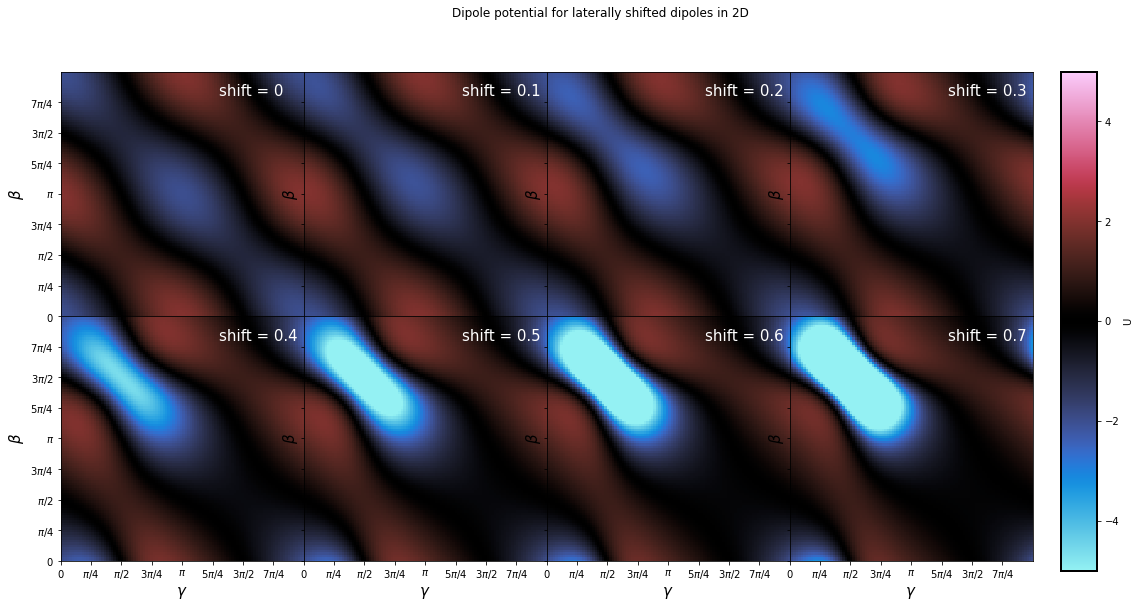

In [10]:
#Lateral shifts 

R=1
fig = plt.figure(figsize=(20,9))
gs = fig.add_gridspec(2,4, hspace=0, wspace=0)
(ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8) = gs.subplots(sharex='col', sharey='row')
axes = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]

shifts = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7]
fig.suptitle("Dipole potential for laterally shifted dipoles in 2D")
vlateral = np.array([0,1])

for shift,ax in zip(shifts,axes):
    vshift = shift*vlateral
    U=np.zeros((100,100))

    Beta = np.linspace(0,2*np.pi,100)
    Gamma = np.linspace(0,2*np.pi,100)

    for i, beta in enumerate(Beta):
        for j, gamma in enumerate(Gamma):
            U[i,j] = dipole_potential_shifted(R,beta,gamma,vshift)


    #U_min, U_max = np.max(U), np.min(U)
    U_min, U_max = -5,5

    c = ax.pcolormesh(Gamma, Beta, U, cmap='cmr.redshift', vmin=U_min, vmax=U_max)
    # set the limits of the plot to the limits of the data
    ax.axis([Gamma.min(), Gamma.max(), Beta.min(), Beta.max()])
    ax.set_xlabel("$\\gamma$",size=15)
    ax.set_ylabel("$\\beta$",size=15)

    ax.set_xticks(np.arange(0, 2*np.pi, np.pi/4))
    ax.set_yticks(np.arange(0, 2*np.pi, np.pi/4))
    labels = ['$0$', r'$\pi/4$', r'$\pi/2$', r'$3\pi/4$', r'$\pi$',
            r'$5\pi/4$', r'$3\pi/2$', r'$7\pi/4$']
    ax.text(2*np.pi*0.65,2*np.pi*0.9, "shift = {}".format(shift),c="white", fontsize=15)
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.11, 0.025, 0.77])
cb = fig.colorbar(c, cax=cbar_ax, label="U")
cb.outline.set_linewidth(2)

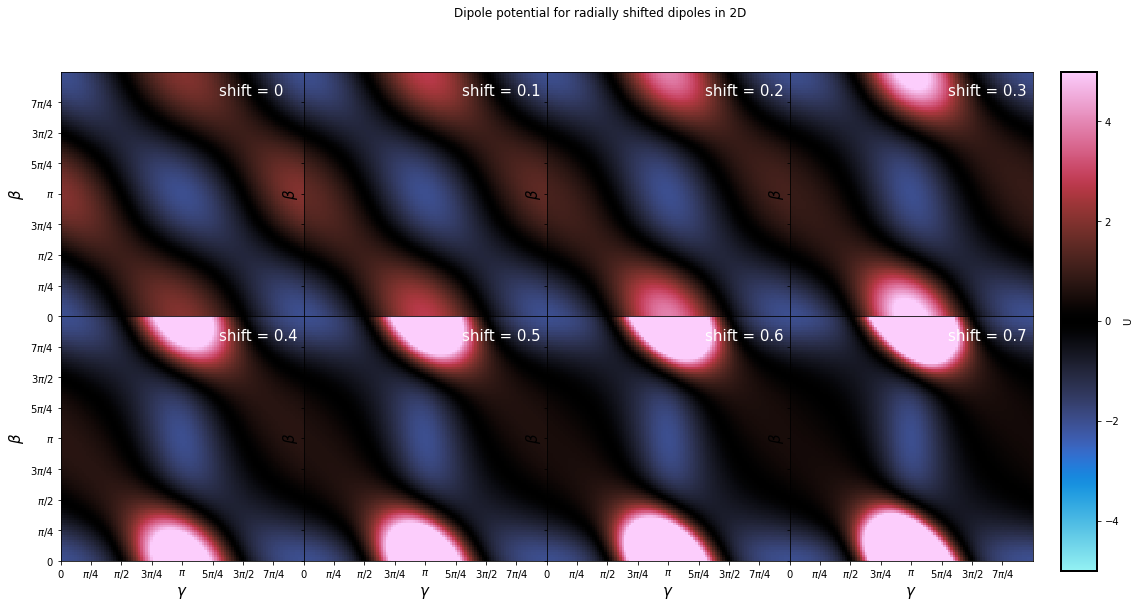

In [11]:
#Radial shifts 

R=1
fig = plt.figure(figsize=(20,9))
gs = fig.add_gridspec(2,4, hspace=0, wspace=0)
(ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8) = gs.subplots(sharex='col', sharey='row')
axes = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]

shifts = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7]
fig.suptitle("Dipole potential for radially shifted dipoles in 2D")
vradial = np.array([1,0])

for shift,ax in zip(shifts,axes):
    vshift = shift*vradial
    U=np.zeros((100,100))

    Beta = np.linspace(0,2*np.pi,100)
    Gamma = np.linspace(0,2*np.pi,100)

    for i, beta in enumerate(Beta):
        for j, gamma in enumerate(Gamma):
            U[i,j] = dipole_potential_shifted(R,beta,gamma,vshift)


    #U_min, U_max = np.max(U), np.min(U)
    U_min, U_max = -5,5 

    c = ax.pcolormesh(Gamma, Beta, U, cmap='cmr.redshift', vmin=U_min, vmax=U_max)
    # set the limits of the plot to the limits of the data
    ax.axis([Gamma.min(), Gamma.max(), Beta.min(), Beta.max()])
    ax.set_xlabel("$\\gamma$",size=15)
    ax.set_ylabel("$\\beta$",size=15)

    ax.set_xticks(np.arange(0, 2*np.pi, np.pi/4))
    ax.set_yticks(np.arange(0, 2*np.pi, np.pi/4))
    labels = ['$0$', r'$\pi/4$', r'$\pi/2$', r'$3\pi/4$', r'$\pi$',
            r'$5\pi/4$', r'$3\pi/2$', r'$7\pi/4$']
    ax.text(2*np.pi*0.65,2*np.pi*0.9, "shift = {}".format(shift),c="white", fontsize=15)
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.11, 0.025, 0.77])
cb = fig.colorbar(c, cax=cbar_ax, label="U")
cb.outline.set_linewidth(2)

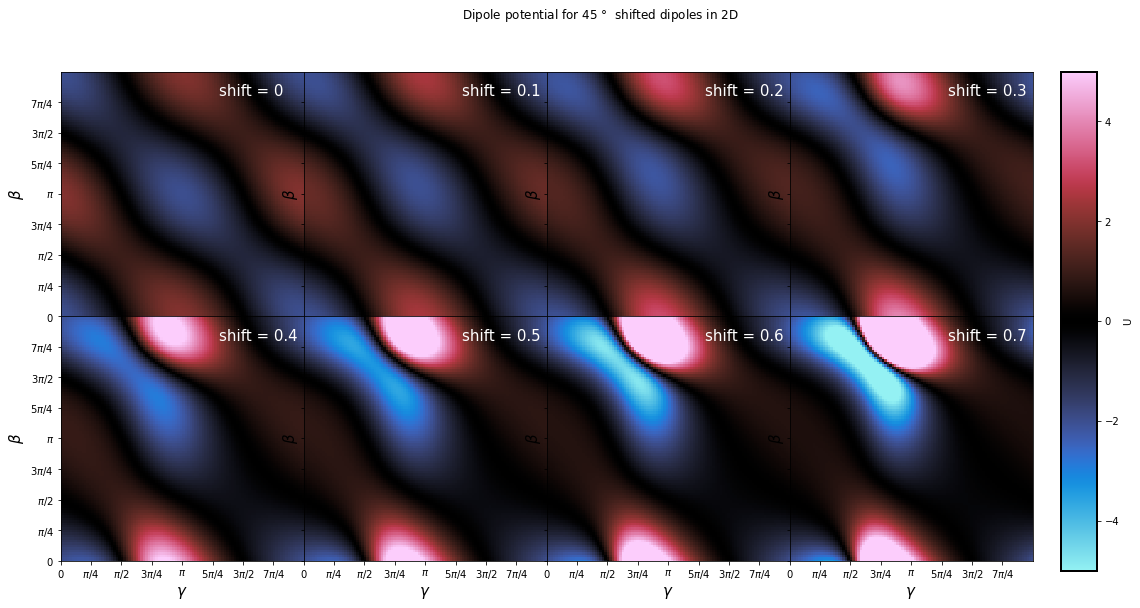

In [12]:
R=1
fig = plt.figure(figsize=(20,9))
gs = fig.add_gridspec(2,4, hspace=0, wspace=0)
(ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8) = gs.subplots(sharex='col', sharey='row')
axes = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]

shifts = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7]
fig.suptitle("Dipole potential for 45 $\degree$  shifted dipoles in 2D")
v45= np.array([1,1])/np.sqrt(2)

for shift,ax in zip(shifts,axes):
    vshift = shift*v45
    U=np.zeros((100,100))

    Beta = np.linspace(0,2*np.pi,100)
    Gamma = np.linspace(0,2*np.pi,100)

    for i, beta in enumerate(Beta):
        for j, gamma in enumerate(Gamma):
            U[i,j] = dipole_potential_shifted(R,beta,gamma,vshift)


    #U_min, U_max = np.max(U), np.min(U)
    U_min, U_max = -5,5 

    c = ax.pcolormesh(Gamma, Beta, U, cmap='cmr.redshift', vmin=U_min, vmax=U_max)
    # set the limits of the plot to the limits of the data
    ax.axis([Gamma.min(), Gamma.max(), Beta.min(), Beta.max()])
    ax.set_xlabel("$\\gamma$",size=15)
    ax.set_ylabel("$\\beta$",size=15)

    ax.set_xticks(np.arange(0, 2*np.pi, np.pi/4))
    ax.set_yticks(np.arange(0, 2*np.pi, np.pi/4))
    labels = ['$0$', r'$\pi/4$', r'$\pi/2$', r'$3\pi/4$', r'$\pi$',
            r'$5\pi/4$', r'$3\pi/2$', r'$7\pi/4$']
    ax.text(2*np.pi*0.65,2*np.pi*0.9, "shift = {}".format(shift),c="white", fontsize=15)
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.11, 0.025, 0.77])
cb = fig.colorbar(c, cax=cbar_ax, label="U")
cb.outline.set_linewidth(2)

### Change of contact energy depending on dipolar shift 

#### 1. Particles with a single dipole 
We want to rescale the used $\lambda$ in our simulations. Formally $\lambda$ compares the minimal dipolar Energy $U_{\text{d,min}}$ at particle contact with the thermal Energy $U_{\text{therm}}=k_{B}T$:

$\lambda = \frac{U_{\text{d,min}}}{U_{\text{therm}}}$ 

Reall that the dipole Energy $U$ was given previously by 

$U(\beta,\gamma) =  \frac{\mu_{1}\mu_{2}}{r^{3}}(\cos{(\gamma-\beta)} - 3\cos{\beta}\cos{\gamma})$

In the case of colloids with dipoles in the center, the minimum energy is given by the dipoles and the connection vector r parallel, i.e where all cosines are 1, which is given by  $U_{\text{d,min}} = \frac{-2\mu^{2}}{r^3}$

Note that we leave out the normalizations of the vacuum permeability $\mu_{0}/4\pi$ here as well as in all equations above.
If we assume that $\mu_{1}=\mu_{2}=\mu$, following the energy formula,  we get for $\lambda$:

$ \lambda = \frac{2\mu^{2}}{r^{3}k_{B}T}$

It is conventional to evaluate the per particle energy, and to set $k_{B}=1$ in simulations. Additionally, in our simulations the diameter $r$ is usually set to 1.  Therefore we end up with 

$\lambda = \frac{\mu^{2}}{T}$. 

Very simple :) 

To evaluate $\lambda$ in case of a shift, in general we have to look at the minimum energy over all possible particle orientations, as now it is not clear anymore which particle orientation yields the minimum energy for different shifts. 

As a first peek, we can evaluate the pair energies for known orientations of laterally shifted dipoles: 
1. Chain 
2. Zipper chain 
3. Antiparallel pair 

This will hopefully reproduce the figure shown here, taken from Ref [1]


<img src="pair_energies_theory_sofia.jpg" width="450">



[1] 10.1088/0953-8984/27/23/234102





##### 1. Chain energy 

The energy for two chain elements at contact does not change with the shift. Assuming $\mu =1$ and the diameter $\sigma=1$ 
we get 

$U_{\text{d,min}} = \frac{-2\mu}{\sigma^{3}} = -2$,

which coincides with Sofias result. 

##### 2. Zipper chain 

The zipper chain element align with their magentic patches facing each other, hence the orientation of the dipoles is still parallel, but the distance between the patches becomes increasingly smaller as the dipoles are shifted. To be precise the minium distance $d$ is given by equal circle chords as function of the shift. 

$d(s) = 2\cdot\sqrt{r^{2} - s^2 }$,

where $r$ denotes the radius. The shift is given as fraction of the radius, with $s\in [0,1]$.  
The energy follows form here and is given by 

$U_{\text{d,min}}(s) = \frac{-2}{d(s)^3}$

##### 3. Antiparallel pair 

In the antiparallel pair the magnetic dipoles align in an antiparallel fashion, which means that instead of a -2 contribution from the angles, we get a -1 contribution. 
The distance declines with the shift. Hence we get for the minimum Energy at contact: 

$U_{\text{d,min}}(s) = \frac{-1}{(1-2s)^3}$


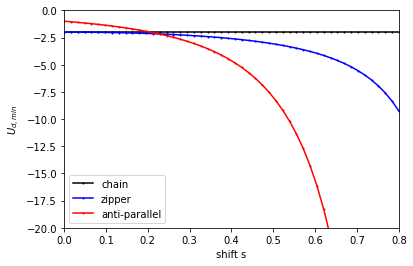

In [13]:
l=50
s=np.linspace(0,0.8,l)

U_chain = -2*np.ones(l)

def U_zipper(s):
    return -2/np.power((2*np.sqrt(np.power(0.5,2)-np.power(s*0.5,2))),3)

def U_ap(s):
    return -1/np.power((1-s),3)

import matplotlib.pyplot as plt 


plt.plot(s,U_chain,label="chain",marker='o', c='k', ms=1)
plt.plot(s,U_zipper(s), label="zipper", marker='o', c='b', ms=1)
plt.plot(s,U_ap(s), label="anti-parallel", marker='o', c='r', ms=1)
plt.xlabel("shift s")
plt.ylabel("$U_{d,min}$")
plt.xlim((0,0.8))
plt.ylim((-20,0))
plt.legend(loc='best')
plt.show()

Upon comparision, Sofias and my result for the minimum energy seems to coincide. 
Great. Now the next step is to obtain this energy for the two patch systems.


#### 1. Particles with a two parallel and laterally shifted dipoles

For particles with more than one intrinsic dipole we have additional energy contributions. 
In specific for particles with two shifted dipoles the contact energy consists of 
four terms 

$U_{\text{d,min}} = U_{p1i,p1j} + U_{p1i, p2j} + U_{p2i, p1j} + U_{p2i,p2j}$ 

where $p1$ and $p2$ denote the dipolar patch 1 and 2, while the indices denote particle i and j. 
In the case of laterally shifted parallle dipoles $U_{p1i,p2j}=U_{p2i,p1j}$ and the formula simplies to 

$U_{\text{d,min}} = U_{p1i,p1j} + 2*U_{p1i, p2j} + U_{p2i,p2j}$ 

In the following we adapt the energy for three different layouts: 

##### 1. Chain energy 
All dipoles are parallel to each other. The main contribution are $U_{p1i,p1j} = U_{p2i,p2j}$, where each one is identical to the one patch case. The two minor contributions are also identical, i.e  $U_{p1i,p2j} = U_{p2i,p1j}$ and since $\beta = \gamma$, we can write the minor contribution as 

$U_{\text{lateral}} = \frac{1}{d^3}( 1 - 3\cos^2{\theta})$

where 
$d = \sqrt{ \sigma^2 + 4s^2}$ 

and 

$\theta = \arctan{\frac{2s}{\sigma}}$.

In total we get 

$U_{\text{d,min}} = 2U_{p1i,p1j} + 2*U_{p1i, p2j}  = -4 + \frac{2}{d^3}( 1 - 3\cos^2{\theta})$


##### 2. Zipper energy 

The zipper energy for two patch magnetic colloids consists of the original contribution

$U_{p1i,p1j} =  \frac{-2}{(2\sqrt{r^{2} - s^2 })^3} = \frac{-2}{(2c_l)^3}$, 

two times the minor patch1/patch2 contribution 

$U_{p1i,p2j} = U_{p2i,p1j} = \frac{1}{d^3}( 1 - 3\cos^2{\theta})$, 

where 

$d = \sqrt{ (2s)^2 + (2c_{l})^2)}, c_{l} = \sqrt{r^2 - s^2}$, 
where $c_{l}$ is the chord length, and 
$\theta = \arctan{s/c_{l}}$ 

and the even lower patch2/patch2 contribution 
with 

$U_{p2i,p2j} = \frac{1}{d^3}( 1 - 3\cos^2{\theta})$, 

where, 

$d = \sqrt{ (4s)^2 + (2c_{l})^2}$, 
and 

$\theta = \arctan{2s/c_{l}}$ 

In sum we get 
$U_{\text{d,min}} = U_{p1i,p1j} + 2*U_{p1i, p2j} + U_{p2i, p2j}$


##### 3. Antiparallel energy 

$U_{p1i,p1j} = \frac{-1}{(1-2s)^3}$

$U_{p1i,p2j} = U_{p2i,p1j} = \frac{-1}{(1)^3} = -1$

$U_{p2i,p2j} = \frac{-1}{(1+2s)^3}$

$U_{\text{d,min}} = U_{p1i,p1j} + 2*U_{p1i, p2j} + U_{p2i, p2j}$

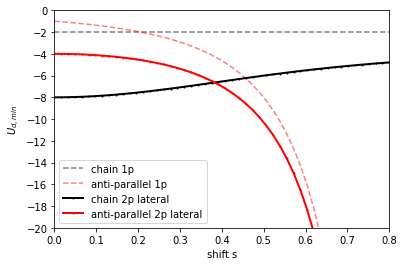

In [19]:
l=50
s=np.linspace(0,0.8,l)


def U2_chain(s):
    sigma=1 
    sr=0.5*s 
    theta = np.arctan(2*sr/sigma)
    d = np.sqrt( 1 + np.power(2*sr,2))
    U = -4 + (2/np.power(d,3))*(1-3*np.power(np.cos(theta),2)) 
    return U

def U2_zipper(s):

    r=0.5
    sr = r*s 
    
    cl = np.sqrt(np.power(r,2)-np.power(sr,2)) 
    U1 = -2/np.power(2*cl,3)

    d = np.sqrt(4*np.power(sr,2) + 4*np.power(cl,2))
    theta = np.arctan(sr/cl)
    U2 = 1/(np.power(d,3))*(1-np.power(np.cos(theta),2))        

    d = np.sqrt(16*np.power(sr,2) + 4*np.power(cl,2))
    theta = np.arctan((2*sr/cl))
    U3 = 1/(np.power(d,3))*(1-np.power(np.cos(theta),2))        

    U = U1 + 2*U2 + U3 
    
    return U

def U2_ap(s):
    sr = 0.5*s 
    U1=-1/np.power(1-2*sr,3)

    U2 = -1 

    U3 = -1/np.power(1+2*sr,3)

    U = U1 + 2*U2 + U3 

    return U

import matplotlib.pyplot as plt 
fig,ax= plt.subplots()
plt.plot(s,U_chain,label="chain 1p",ls='--', c='k', alpha=0.5)
#plt.plot(s,U_zipper(s), label="zipper 1p", ls='--', c='b', alpha=0.5)
plt.plot(s,U_ap(s), label="anti-parallel 1p", ls='--', c='r', alpha=0.5)

plt.plot(s,U2_chain(s),label="chain 2p lateral",marker='o', c='k', lw=2, ms=1)
#plt.plot(s,U2_zipper(s), label="zipper 2p lateral", marker='o', c='b', lw=2, ms=1)
plt.plot(s,U2_ap(s), label="anti-parallel 2p lateral", marker='o', c='r', lw=2, ms=1)
plt.xlabel("shift s")
plt.ylabel("$U_{d,min}$")
plt.xlim((0,0.8))
plt.ylim((-20,0))

ax.set_yticks([0,-2,-4,-6,-8,-10,-12,-14,-16,-18,-20])
plt.legend(loc='best')
plt.savefig("without_zipper1.png",dpi=400)
plt.show()

In [15]:

def renormalize_lbda(lbda,s):
    MIN_lbda = np.min([U2_chain(s), U2_zipper(s), U2_ap(s)])
    RE_lbda = lbda*MIN_lbda/(-2)
    return RE_lbda 

lbda = np.array([1,1.5,2,2.3,2.5,3,3.5,4,4.5,5,6,7,8,9,10,15,20,25,30,35,40,50,60,70,80,90,100,120,150,170,200,400])
renormalized = renormalize_lbda(lbda,0.4)

def inverted_renormalize_lbda(lbda,s):
    MIN_lbda = np.min([U2_chain(s), U2_zipper(s), U2_ap(s)])
    INRE_lbda = -2*lbda/MIN_lbda
    return INRE_lbda 

renormalized = inverted_renormalize_lbda(lbda,0)

In [16]:
renormalized

array([  0.25 ,   0.375,   0.5  ,   0.575,   0.625,   0.75 ,   0.875,
         1.   ,   1.125,   1.25 ,   1.5  ,   1.75 ,   2.   ,   2.25 ,
         2.5  ,   3.75 ,   5.   ,   6.25 ,   7.5  ,   8.75 ,  10.   ,
        12.5  ,  15.   ,  17.5  ,  20.   ,  22.5  ,  25.   ,  30.   ,
        37.5  ,  42.5  ,  50.   , 100.   ])